## Demo of Astronomical Interactive Data Analysis Techniques using IPython/Jupyter Notebooks and Ginga

This notebook shows examples of using an interactive Ginga viewer running in an HTML5 canvas with an IPython Notebook.  You do not need a special widget set to run this, just an HTML5 compliant browser.

See NOTES at end for more info installation/requirements.

If you want to play with this stuff, you can get the notebook [here](https://github.com/ejeschke/ginga/blob/main/ginga/examples/jupyter-notebook/ginga_ipython_demo.ipynb)

There are two example FITS files used in this document.
You can get them [here](https://docs.google.com/file/d/0B6XTrKRuqwwKclUwTmxJbGlBTlU/edit?usp=sharing)
and [here](https://docs.google.com/file/d/0B6XTrKRuqwwKLXNtMjJUTmZBZ3M/edit?usp=sharing).
Put them in the same directory where you downloaded the notebook.

In [1]:
# Requirements:
from ginga.version import version
version

# Get ginga from github (https://github.com/ejeschke/ginga) or
#   pypi (https://pypi.python.org/pypi/ginga)
# Ginga documentation at: http://ginga.readthedocs.io/en/latest/

'5.1.0.dev24+g25fdc933'

In [2]:
# setup a viewer server
from ginga.web.pgw import ipg

server = ipg.make_server(host='localhost', port=9914)

In [3]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [4]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')

In [5]:
# where is my viewer
v1.url

'http://localhost:9914/app?id=v1'

In [ ]:
# open the viewer in a new window
v1.open()

*NOTE*: if you don't have the `webbrowser` module, *open the link that was printed in the cell above in a new window* to get the viewer.  

You can open as many of these viewers as you want--just keep a handle to it and use a different name for each unique one.

Keyboard/mouse bindings in the viewer window: http://ginga.readthedocs.io/en/latest/quickref.html

You will want to check the box that says "I'm using a trackpad" if you are--it makes zooming much smoother

In [6]:
# Load an image into the viewer
# (change the path to where you downloaded the sample images, or use your own)
v1.load('/Users/eric/testdata/SPCAM/SUPA01118766.fits')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2009-08-22T09:35:55.248' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]


In [ ]:
# Example of embedding a viewer
v1.embed(height=650)

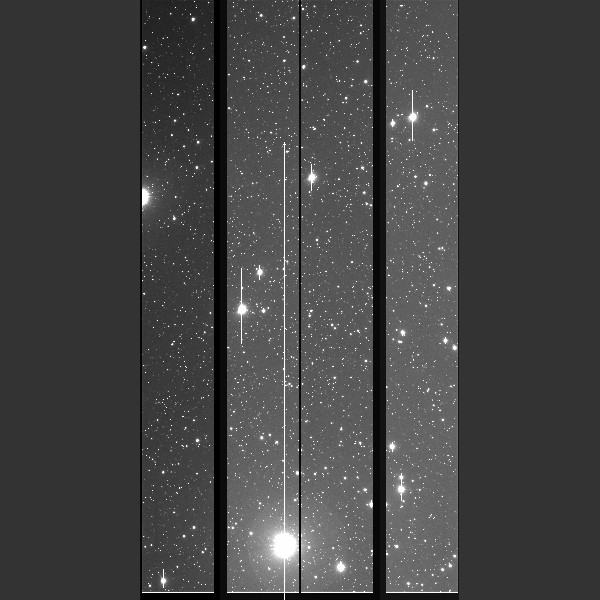

In [7]:
# capture the screen
v1.show()


In [8]:
# Let's get the pan position we just set
dx, dy = v1.get_pan()
dx, dy

(1406.1233333333334, 2107.5133333333333)

In [9]:
# Getting values from the FITS header is also easy
img = v1.get_image()
hdr =img.get_header()
hdr['OBJECT']

'M27'

In [10]:
# What are the coordinates of the pan position?
# This uses astropy.wcs under the hood if you have it installed
img.pixtoradec(dx, dy)

(300.15285533516203, 22.80442730443103)

In [11]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [12]:
# Let's do an example of the two-way interactivity
# First, let's add a drawing canvas
canvas = v1.add_canvas()

In [13]:
# delete all objects on the canvas
canvas.delete_all_objects()
# set the drawing parameters
canvas.set_drawtype('point', color='black')

Now, in the Ginga window, draw a point using the right mouse button (if you only have one mouse button (e.g. Mac) press and release spacebar, then press and release 'b' to go into draw mode; then click and drag on the touchpad. Press 'esc' to cancel draw mode)

In [14]:
# get the pixel coordinates of the point we just drew
p = canvas.objects[0]
p.x, p.y

(1384.7583333333334, 2314.0416666666665)

In [15]:
# Get the RA/DEC in degrees of the point
img.pixtoradec(p.x, p.y)

(300.15417579345757, 22.81601354228682)

In [16]:
# Get RA/DEC in H M S sign D M S
img.pixtoradec(p.x, p.y, format='hms')

(20, 0, 37.00219042981644, 1, 22, 48, 57.6487522325624)

In [17]:
# Get RA/DEC in classical string notation
img.pixtoradec(p.x, p.y, format='str')

('20:00:37.002', '+22:48:57.00')

In [18]:
# Verify we have a valid coordinate system defined
img.wcs.coordsys

'fk5'

In [19]:
# Get viewer model holding data
image = v1.get_image()
image.get_minmax()

(135, 65535)

In [20]:
# get viewer data
data_np = image.get_data()
import numpy as np
np.mean(data_np)

687.8045221510434

In [21]:
# Set viewer cut levels
v1.cut_levels(170, 2000)

In [22]:
# set a color map on the viewer 
v1.set_color_map('smooth')

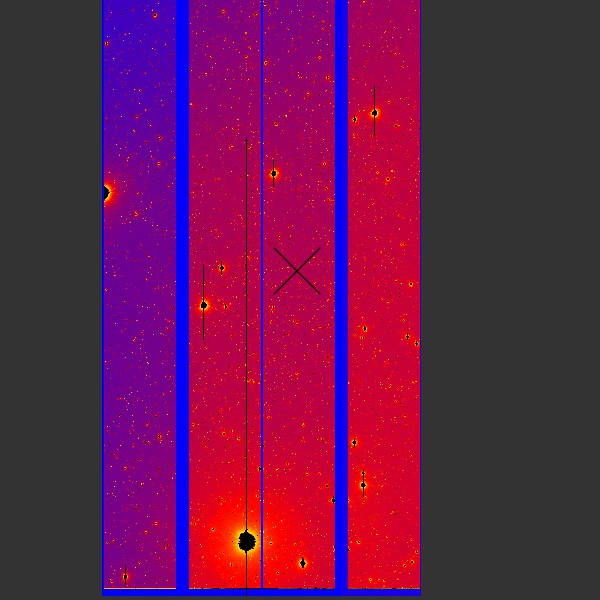

In [23]:
# Image will appear in this output
v1.show()

In [24]:
# Set color distribution algorithm
# choices: linear, log, power, sqrt, squared, asinh, sinh, histeq, 
v1.set_color_algorithm('linear')

In [26]:
# Example of setting another draw type.
canvas.delete_all_objects()
canvas.set_drawtype('rectangle', color='white')

Now right-drag to draw a *small* rectangle in the Ginga image.
Remember: On a single button pointing device, press and release spacebar, press and release 'b', then click and drag; press 'esc' to exit draw mode.

Try to include some objects. 


In [27]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)
peaks[:20]

[(30.0, 6.0),
 (100.0, 6.0),
 (67.0, 8.0),
 (84.0, 10.0),
 (232.0, 11.0),
 (2.0, 28.0),
 (171.0, 30.0),
 (179.0, 33.0),
 (124.0, 46.0),
 (256.0, 49.0),
 (124.0, 50.0),
 (214.0, 51.0),
 (154.0, 53.0),
 (312.0, 53.0),
 (40.0, 64.0),
 (155.0, 64.0),
 (302.0, 65.0),
 (283.0, 71.0),
 (294.0, 79.0),
 (136.0, 87.0)]

In [28]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

/Users/eric/miniconda3/envs/ginga-dev/lib/python3.9/site-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


111

In [29]:
# example of what is returned
o1 = objs[0]
o1

{'objx': 29.74552332290625, 'objy': 6.145384542162644, 'pos': 0.9412178095815386, 'oid_x': 30.020208661991436, 'oid_y': 9.915787520050905, 'fwhm_x': 2.9355930898600873, 'fwhm_y': 2.841533407545581, 'fwhm': 2.888946079059965, 'fwhm_radius': 15, 'brightness': 4354.9042339083435, 'elipse': 0.9679588827758859, 'x': 30, 'y': 6, 'skylevel': 539.8, 'background': 476.0, 'ensquared_energy_fn': None, 'encircled_energy_fn': None}

In [30]:
# pixel coords are for cutout, so add back in origin of cutout
#  to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1+o1.objx, y1+o1.objy)

(300.1588359588577, 22.797970149218777)

In [31]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1+obj.objx, y1+obj.objy
    if r.contains_pt((x, y)):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((x1+x2)/2, (y1+y2)/2)
v1.scale_to(0.75, 0.75)

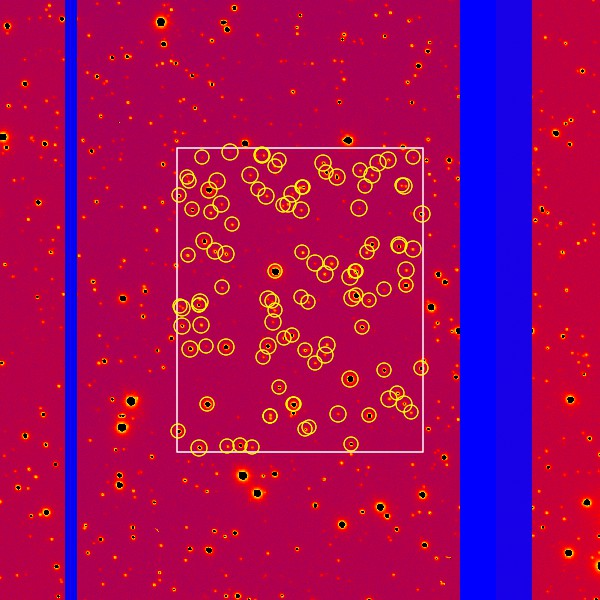

In [32]:
v1.show()

How about some plots...?

In [33]:
# Load an image from a spectrograph at least 1000x1000 (e.g. spectra.fits)
v1.load('/Users/eric/testdata/HDS/HDSA00073506.fits')

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Set DATE-END to '2011-06-08T14:24:56.135' from MJD-END'. [astropy.wcs.wcs]


In [34]:
# swap XY, flip Y, change colormap back to "ramp"
v1.set_color_map('gray')
v1.transform(False, True, True)
v1.auto_levels()

In [35]:
# Programmatically add a line along the figure at designated coordinates
canvas.delete_all_objects()
Line = canvas.get_draw_class('line')
l1 = Line(0, 512, 250, 512, color='red')
tag = canvas.add(l1)

In [36]:
# Set the pan position and zoom to 1:1.  Show what we did.
v1.set_pan(125, 512)
v1.scale_to(1.0, 1.0)

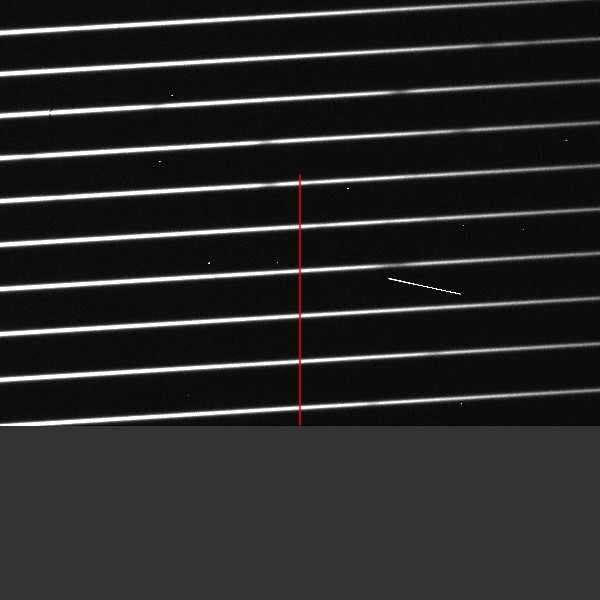

In [37]:
v1.show()

In [38]:
# Get the pixel values along this line
img = v1.get_image()
values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
values[:10]

[1173.0,
 1186.0,
 1183.0,
 1187.0,
 1190.0,
 1177.0,
 1187.0,
 1181.0,
 1188.0,
 1190.0]

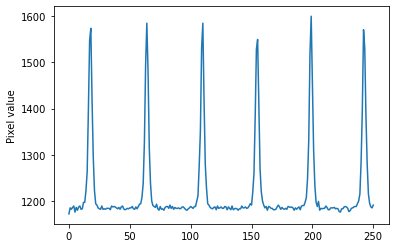

In [39]:
# Plot the 'cuts'
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.cla()
plt.plot(values)
plt.ylabel('Pixel value')

plt.show()

In [40]:
# Plot the cuts that we will draw interactively
canvas.delete_all_objects()
canvas.set_drawtype('line')

Now draw a line through the image (remember to use right mouse btn or else press 'space' then 'b' first)

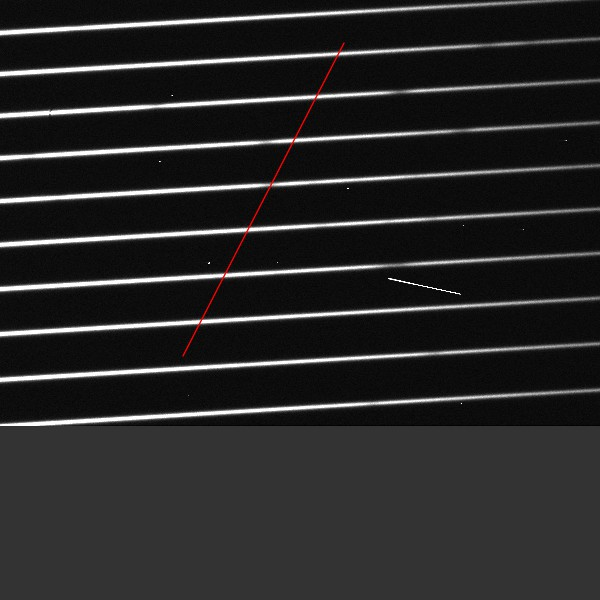

In [42]:
# show our line we drew
v1.show()

In [43]:
def getplot(v1):
    l1 = canvas.objects[0]
    img = v1.get_image()
    values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
    plt.cla()
    
    plt.plot(values)
    plt.ylabel('Pixel value')
    plt.show()

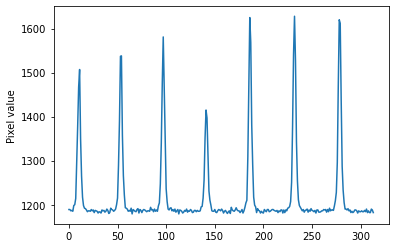

In [44]:
getplot(v1)

## Other ways of loading data

In [ ]:
# make some random data in a numpy array
import numpy as np
import random
data_np = np.random.rand(512, 512)

In [ ]:
# example of loading numpy data directly to the viewer
v1.load_data(data_np)
v1.show()

In [ ]:
# example of loading astropy.io.fit HDUs
from astropy.io import fits
fits_f = fits.open('camera.fits', 'readonly')
hdu = fits_f[0]
v1.load_hdu(hdu)

## Miscellaneous

In [ ]:
# the default setting for HTML5 canvas rendering is 'jpeg'
settings = v1.get_settings()
settings.get('html5_canvas_format')

In [ ]:
# using PNG will result in slightly greater clarity (especially for text overlay), but does introduce a
# slight performance hit because more data needs to be transferred each redraw between client and server
settings.set(html5_canvas_format='png')

In [ ]:
# If you want to resize the viewer, use this method
v1.resize(1000, 700)

Th-th-th-that's all folks!

## Requirements

Needed packages for this notebook:

- [`ginga`](https://github.com/ejeschke/ginga), jupyter/ipython w/notebook feature
- typical scientific python reqs: `numpy`, `scipy`, `astropy`
- for drawing, you will need either `pillow`, OpenCv or the `pycairo` module. 
- optional, but highly recommended: `webbrowser`

Latest Ginga documentation, including detailed installation instructions, can be found [here](http://ginga.readthedocs.io/en/latest/).